In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy.stats as ss

from collections import Counter
import math

# Работа с данными (к лаб. 1)

In [2]:
df = pd.read_csv("mushrooms.csv").drop_duplicates()
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [5]:
print(f"columns with misiing values (?): {[col for col in df.columns if (df[col]=='?').sum() > 0]}")
print(f"unique value columns: {[col for col in df.columns if df[col].nunique() <= 1]}")

columns with misiing values (?): ['stalk-root']
unique value columns: ['veil-type']


In [6]:
print(f"{(df['stalk-root']=='?').sum() / df.shape[0]} of 'stalk-root' is missing")

0.3052683407188577 of 'stalk-root' is missing


In [7]:
df = df.drop(['stalk-root', 'veil-type'], axis=1)

In [8]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


# Исследование данных

In [9]:
# https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
# https://stackoverflow.com/questions/54931514/theils-u-1-theils-u-2-forecast-coefficient-formula-in-python
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

def apply(df, f):
    n = df.shape[1]
    mat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            mat[i][j] = f(df[df.columns[i]], df[df.columns[j]])
    ndf = pd.DataFrame(mat, index=df.columns, columns=df.columns)
    return ndf

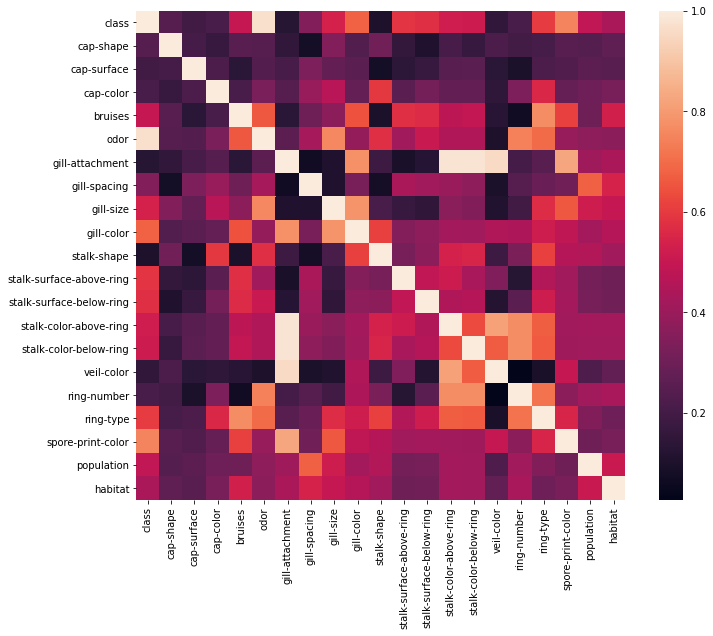

In [10]:
cramers_v_mat = apply(df, cramers_v)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cramers_v_mat, vmax=1.0, square=True);

In [11]:
row = cramers_v_mat.iloc[0]
row.sort_values(axis='index', ascending=False).head()

class                0.999753
odor                 0.970558
spore-print-color    0.752036
gill-color           0.679877
ring-type            0.602900
Name: class, dtype: float64

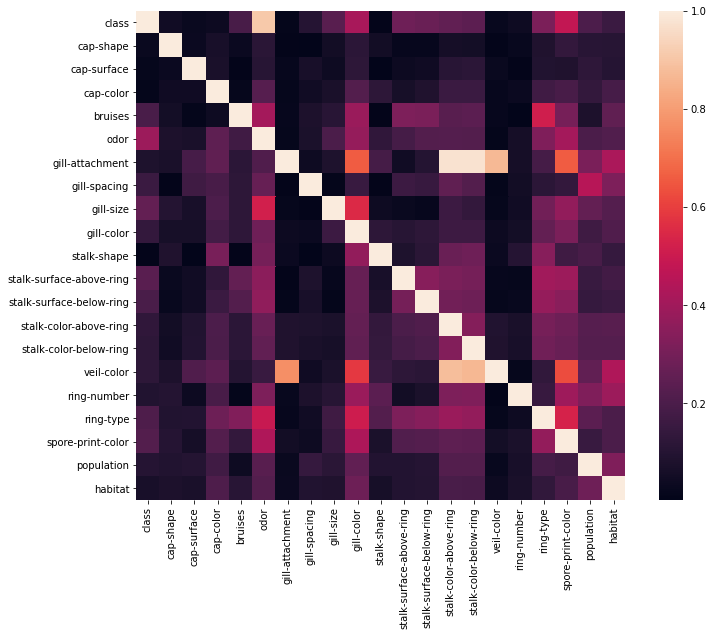

In [12]:
theils_u_mat = apply(df, theils_u)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(theils_u_mat, vmax=1.0, square=True);

In [13]:
row = theils_u_mat.iloc[0]
row.sort_values(axis='index', ascending=False).head()

class                1.000000
odor                 0.906920
spore-print-color    0.481153
gill-color           0.417367
ring-type            0.318318
Name: class, dtype: float64

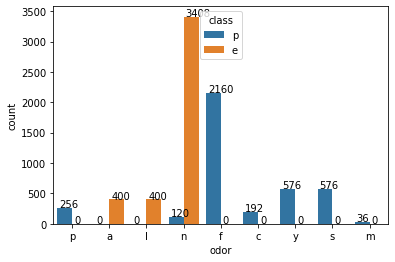

In [14]:
plt.subplot()
ax=sns.countplot(x='odor',hue='class',data=df)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

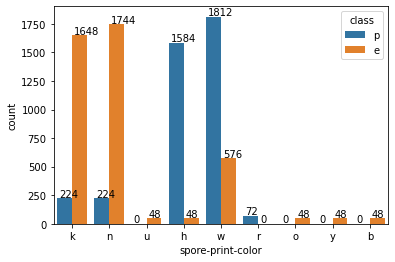

In [15]:
plt.subplot()
ax=sns.countplot(x='spore-print-color',hue='class',data=df)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

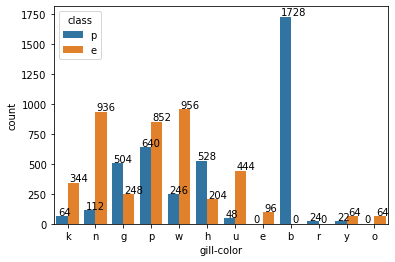

In [16]:
plt.subplot()
ax=sns.countplot(x='gill-color',hue='class',data=df)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

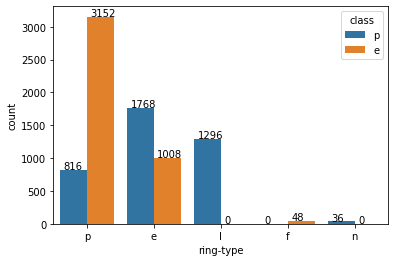

In [17]:
plt.subplot()
ax=sns.countplot(x='ring-type',hue='class',data=df)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

Т.о. наиболее информатиыными признаками будут: 'odor', 'spore-print-color', 'gill-color', 'ring-type'

# Обучение моделей (к лаб. 2)

In [18]:
feature_cols = ['odor', 'spore-print-color', 'gill-color', 'ring-type']
y = df['class'].map({'p' : 1, 'e' : 0})
X = pd.get_dummies(df[feature_cols])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import models

In [20]:
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import precision_score, recall_score, accuracy_score

def print_metrics(clf, X, y, k_folds=5, average='macro'):
    kf = StratifiedKFold(n_splits=k_folds, random_state=123, shuffle=True)
    precision = np.zeros(k_folds)   
    recall = np.zeros(k_folds)  
    test_accuracy = np.zeros(k_folds)
    train_accuracy = np.zeros(k_folds)
    
    for i, (train_index, val_index) in enumerate(kf.split(X, y)):
        X_train, y_train = X.loc[train_index].to_numpy(), y.loc[train_index].to_numpy()
        X_val, y_val = X.loc[val_index].to_numpy(), y.loc[val_index].to_numpy()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        y_train_pred = clf.predict(X_train)
        
        precision[i] = precision_score(y_val, y_pred, average=average)
        recall[i] = recall_score(y_val, y_pred, average=average)
        
        train_accuracy[i] = accuracy_score(y_train, y_train_pred)
        test_accuracy[i] = accuracy_score(y_val, y_pred)
        
    print(f'precision: {precision.mean()}')
    print(f'recall: {recall.mean()}')
    print()
    print(f'train_accuracy: {train_accuracy.mean()}')
    print(f'test_accuracy: {test_accuracy.mean()}')    

# Логистическая регрессия

In [21]:
%%time
LR = models.LogisticRegression()

print_metrics(LR, X, y)

precision: 0.9405786145236998
recall: 0.927476412020747

train_accuracy: 0.9300837193887818
test_accuracy: 0.9300839712012128
CPU times: user 9.07 s, sys: 14 s, total: 23.1 s
Wall time: 5.39 s


In [22]:
%%time
sLR = LogisticRegression(random_state=0)

print_metrics(sLR, X, y)

precision: 0.9943609561796947
recall: 0.9938713608048584

train_accuracy: 0.9940915785860547
test_accuracy: 0.9940915498294809
CPU times: user 1.03 s, sys: 1.45 s, total: 2.48 s
Wall time: 594 ms


# KNN

In [23]:
%%time
KNN = models.KNN(n_neighbors=3)

print_metrics(KNN, X, y)

precision: 0.9948264267201384
recall: 0.9943818906873094

train_accuracy: 0.9945839478262928
test_accuracy: 0.9945839333080713
CPU times: user 31.9 s, sys: 197 ms, total: 32.1 s
Wall time: 32.1 s


In [24]:
%%time
sKNN = KNeighborsClassifier(n_neighbors=3)

print_metrics(sKNN, X, y)

precision: 0.9741675140605851
recall: 0.9745486313459064

train_accuracy: 0.9755046007078011
test_accuracy: 0.973904888215233
CPU times: user 12.4 s, sys: 13.5 ms, total: 12.4 s
Wall time: 12.5 s


# Решающее дерево

In [25]:
%%time
DTC = models.DecisionTree(max_depth=4)

print_metrics(DTC, X, y)

precision: 0.9945936236297535
recall: 0.9941267886464932

train_accuracy: 0.9945223998958419
test_accuracy: 0.9943377794619174
CPU times: user 56.5 s, sys: 32.1 ms, total: 56.5 s
Wall time: 56.6 s


In [26]:
%%time
sDTC = DecisionTreeClassifier(max_depth=4)

print_metrics(sDTC, X, y)

precision: 0.9945936236297535
recall: 0.9941267886464932

train_accuracy: 0.9945223998958419
test_accuracy: 0.9943377794619174
CPU times: user 86.1 ms, sys: 0 ns, total: 86.1 ms
Wall time: 84.9 ms


# Случайный лес

In [27]:
%%time
RFC = models.RandomForest(max_depth=4, n_estimators=25)

print_metrics(RFC, X, y)

precision: 0.9253052863759678
recall: 0.9144129600796698

train_accuracy: 0.9188819818433605
test_accuracy: 0.9167917392951876
CPU times: user 3min 44s, sys: 230 ms, total: 3min 44s
Wall time: 3min 44s


In [29]:
%%time
sRFC = RandomForestClassifier(max_depth=4, n_estimators=25, random_state=0)

print_metrics(sRFC, X, y)

precision: 0.9405786145236998
recall: 0.927476412020747

train_accuracy: 0.9300837193887818
test_accuracy: 0.9300839712012128
CPU times: user 549 ms, sys: 4.09 ms, total: 553 ms
Wall time: 554 ms


Видно, что достигается хорошее качество классификации, при этом не происходит переобучения моделей.